**Import libraries**

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


**Preprocessing the training set**

In [61]:
# Step 1: Read the CSV file
csv_path = 'train.csv'
train_data = pd.read_csv(csv_path, header=0)

ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [0])], remainder = 'passthrough')
train_data = pd.DataFrame(ct.fit_transform(train_data))

y_train = train_data.iloc[:, 0:10].values

X_train = train_data.iloc[:, 10:]

images = []
for index, row in X_train.iterrows():
    image = np.array(row, dtype=float).reshape(28, 28)
    images.append(image)

images_array = np.array(images)

images_array = np.expand_dims(images_array, axis=-1)

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

train_set = train_datagen.flow(
    images_array,
    y_train,
    batch_size = 32,
)

       label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995      0       0       0       0       0       0       0       0       0   
41996      1       0       0       0       0       0       0       0       0   
41997      7       0       0       0       0       0       0       0       0   
41998      6       0       0       0       0       0       0       0       0   
41999      9       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775 

**Preprocessing the training set**

In [96]:
csv_path = 'test.csv'
train_data = pd.read_csv(csv_path, header = 0)

X_test = train_data.iloc[:, :]

t_images = []
for index, row in X_test.iterrows():
  image = np.array(row, dtype = float).reshape(28, 28)
  t_images.append(image)

t_images_array = np.array(t_images)

t_images_array = np.expand_dims(t_images_array, axis = -1)

t_images_array /= 255.0

       pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
27995       0       0       0       0       0       0       0       0       0   
27996       0       0       0       0       0       0       0       0       0   
27997       0       0       0       0       0       0       0       0       0   
27998       0       0       0       0       0       0       0       0       0   
27999       0       0       0       0       0       0       0       0       0   

       pixel9  ...  pixel77

**Build the CNN**

In [65]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu', input_shape = [28, 28, 1]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))
cnn.add(tf.keras.layers.Dense(units = 10, activation = 'softmax'))

**Compile and train**

In [102]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
cnn.fit(x = train_set, epochs = 10)

Epoch 1/10
1313/1313 [==============================] - 53s 39ms/step - loss: 0.0671 - accuracy: 0.9787
Epoch 2/10
1313/1313 [==============================] - 52s 40ms/step - loss: 0.0587 - accuracy: 0.9817
Epoch 3/10
1313/1313 [==============================] - 51s 39ms/step - loss: 0.0503 - accuracy: 0.9840
Epoch 4/10
1313/1313 [==============================] - 47s 36ms/step - loss: 0.0458 - accuracy: 0.9857
Epoch 5/10
1313/1313 [==============================] - 48s 37ms/step - loss: 0.0419 - accuracy: 0.9866
Epoch 6/10
1313/1313 [==============================] - 47s 36ms/step - loss: 0.0388 - accuracy: 0.9879
Epoch 7/10
1313/1313 [==============================] - 50s 38ms/step - loss: 0.0371 - accuracy: 0.9881
Epoch 8/10
1313/1313 [==============================] - 45s 34ms/step - loss: 0.0345 - accuracy: 0.9885
Epoch 9/10
1313/1313 [==============================] - 50s 38ms/step - loss: 0.0327 - accuracy: 0.9895
Epoch 10/10
1313/1313 [==============================] - 48s 37m

**Predict for the testing set**

In [103]:
t_images_array = np.reshape(t_images_array, (28000, 28, 28, 1))

In [104]:
y_pred = cnn.predict(t_images_array)

predicted_classes = np.argmax(y_pred, axis=1)

875/875 [==============================] - 8s 9ms/step


1/1 [==============================] - 0s 106ms/step


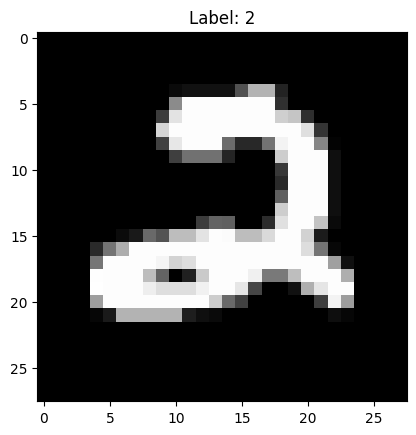

1/1 [==============================] - 0s 28ms/step


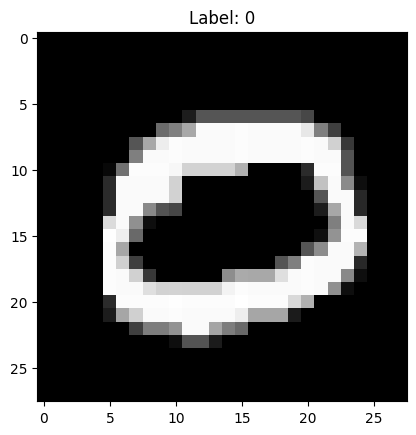

1/1 [==============================] - 0s 32ms/step


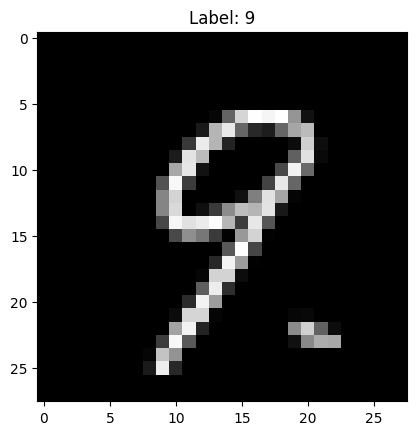

1/1 [==============================] - 0s 26ms/step


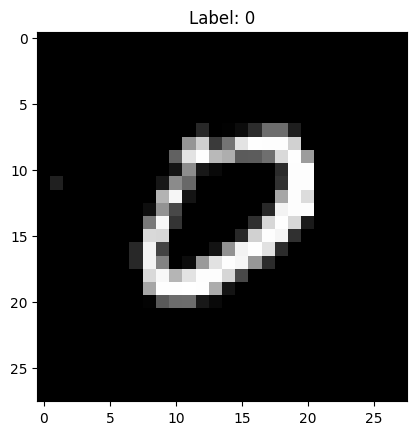

1/1 [==============================] - 0s 26ms/step


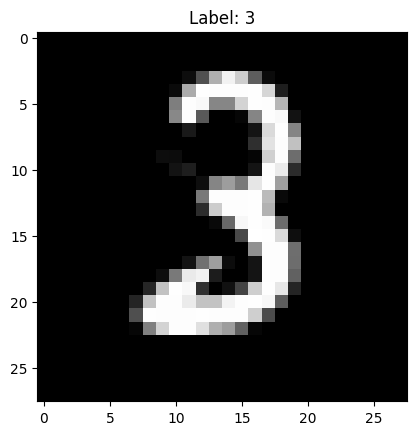

1/1 [==============================] - 0s 26ms/step


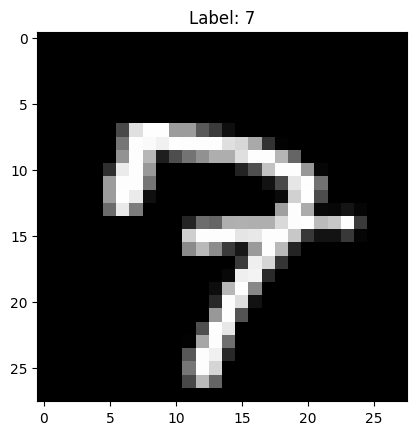

1/1 [==============================] - 0s 25ms/step


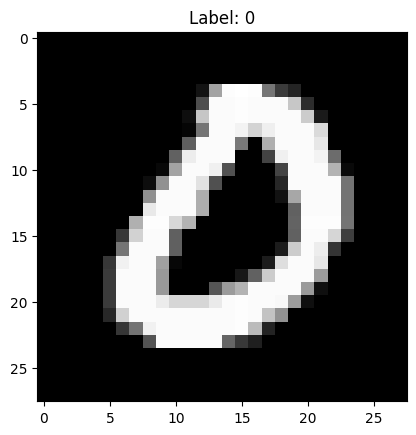

1/1 [==============================] - 0s 28ms/step


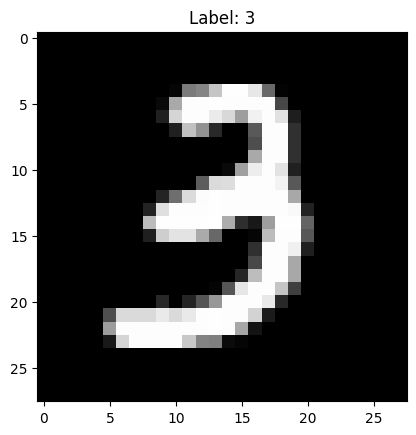

1/1 [==============================] - 0s 36ms/step


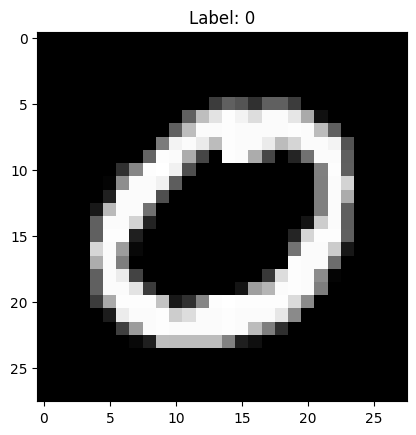

1/1 [==============================] - 0s 39ms/step


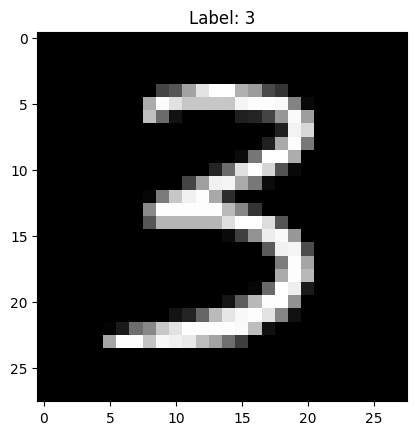

In [106]:
# Ensure labels match images visually
for i in range(10):
  plt.imshow(t_images_array[i].reshape(28, 28), cmap='gray')
  plt.title(f"Label: {np.argmax(cnn.predict(t_images_array[i]))}")
  plt.show()

**Write into csv**

In [105]:
image_ids = np.arange(1, len(predicted_classes) + 1)

results_df = pd.DataFrame({
    'ImageId': image_ids,
    'Label': predicted_classes
})

results_df.to_csv('mySol.csv', index = False)